#Load Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import sklearn as sk
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier as RF
import lightgbm as lgb
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import PolynomialFeatures
from catboost import Pool,CatBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm, model_selection,tree, linear_model, neighbors, naive_bayes, ensemble
from sklearn import discriminant_analysis, gaussian_process

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/GAMMAFEST IPB 2023 /train.csv')
Y = pd.read_csv('/content/drive/MyDrive/GAMMAFEST IPB 2023 /test.csv')
sub = pd.read_csv('/content/drive/MyDrive/GAMMAFEST IPB 2023 /sample_submission.csv')

In [ ]:
print('Shape of X: ',X.shape)
print('Shape of Y: ',Y.shape)
print('Shape of submission: ',sub.shape)

Shape of X:  (35973, 40)
Shape of Y:  (11990, 39)
Shape of submission:  (11990, 2)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      35973 non-null  int64  
 1   DC024   35973 non-null  int64  
 2   DC025   35973 non-null  int64  
 3   DC205   35962 non-null  float64
 4   DC206   35952 non-null  float64
 5   DC207   35929 non-null  float64
 6   DC208   35960 non-null  float64
 7   DC209   35955 non-null  float64
 8   DC210   35932 non-null  float64
 9   DC211   35949 non-null  float64
 10  DC212   35949 non-null  float64
 11  DC213   35896 non-null  float64
 12  DC214   35964 non-null  float64
 13  DC215   35959 non-null  float64
 14  DC216   35934 non-null  float64
 15  DC217   35973 non-null  int64  
 16  DC219   35973 non-null  int64  
 17  DC220   35969 non-null  float64
 18  DC226   35967 non-null  float64
 19  DC230a  35962 non-null  float64
 20  DC230b  32964 non-null  float64
 21  DC232   32949 non-null  float64
 22

In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11990 entries, 0 to 11989
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      11990 non-null  int64
 1   DC024   11990 non-null  int64
 2   DC025   11990 non-null  int64
 3   DC205   11990 non-null  int64
 4   DC206   11990 non-null  int64
 5   DC207   11990 non-null  int64
 6   DC208   11990 non-null  int64
 7   DC209   11990 non-null  int64
 8   DC210   11990 non-null  int64
 9   DC211   11990 non-null  int64
 10  DC212   11990 non-null  int64
 11  DC213   11990 non-null  int64
 12  DC214   11990 non-null  int64
 13  DC215   11990 non-null  int64
 14  DC216   11990 non-null  int64
 15  DC217   11990 non-null  int64
 16  DC219   11990 non-null  int64
 17  DC220   11990 non-null  int64
 18  DC226   11990 non-null  int64
 19  DC230a  11990 non-null  int64
 20  DC230b  11990 non-null  int64
 21  DC232   11990 non-null  int64
 22  DC232b  11990 non-null  int64
 23  DC235   119

In [ ]:
X.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum


In [ ]:
X['DC201'] = X['DC201'].replace({'Layak Minum': 1, 'Tidak Layak Minum': 0})

In [ ]:
X.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,1.0
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,1.0
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,1.0
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,1.0
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,1.0


In [ ]:
X.isnull().sum()

id            0
DC024         0
DC025         0
DC205        11
DC206        21
DC207        44
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10446
DC237        21
DC237a       37
DC237b       37
DC237c       37
DC237d       37
DC237e       37
DC237f       37
DC241       612
DC242      5374
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        11
DC142a       52
DC201         3
dtype: int64

In [ ]:
for col in X.columns:
    if X[col].isnull().sum() and X[col].dtypes != 'float64':
        X[col].loc[(X[col].isnull())] = X[col].mode().min()
for col in X.columns:
    if X[col].isnull().sum() and X[col].dtypes == 'float64':
        X[col].loc[(X[col].isnull())] = X[col].mode().min()

In [ ]:
X.isnull().sum()

id        0
DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC235     0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC242     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
DC201     0
dtype: int64

In [ ]:
X.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,1.0
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,1.0
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,1.0
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,1.0,1.0,0.0,1.0,1,11.0,85.0,1.0
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,1.0


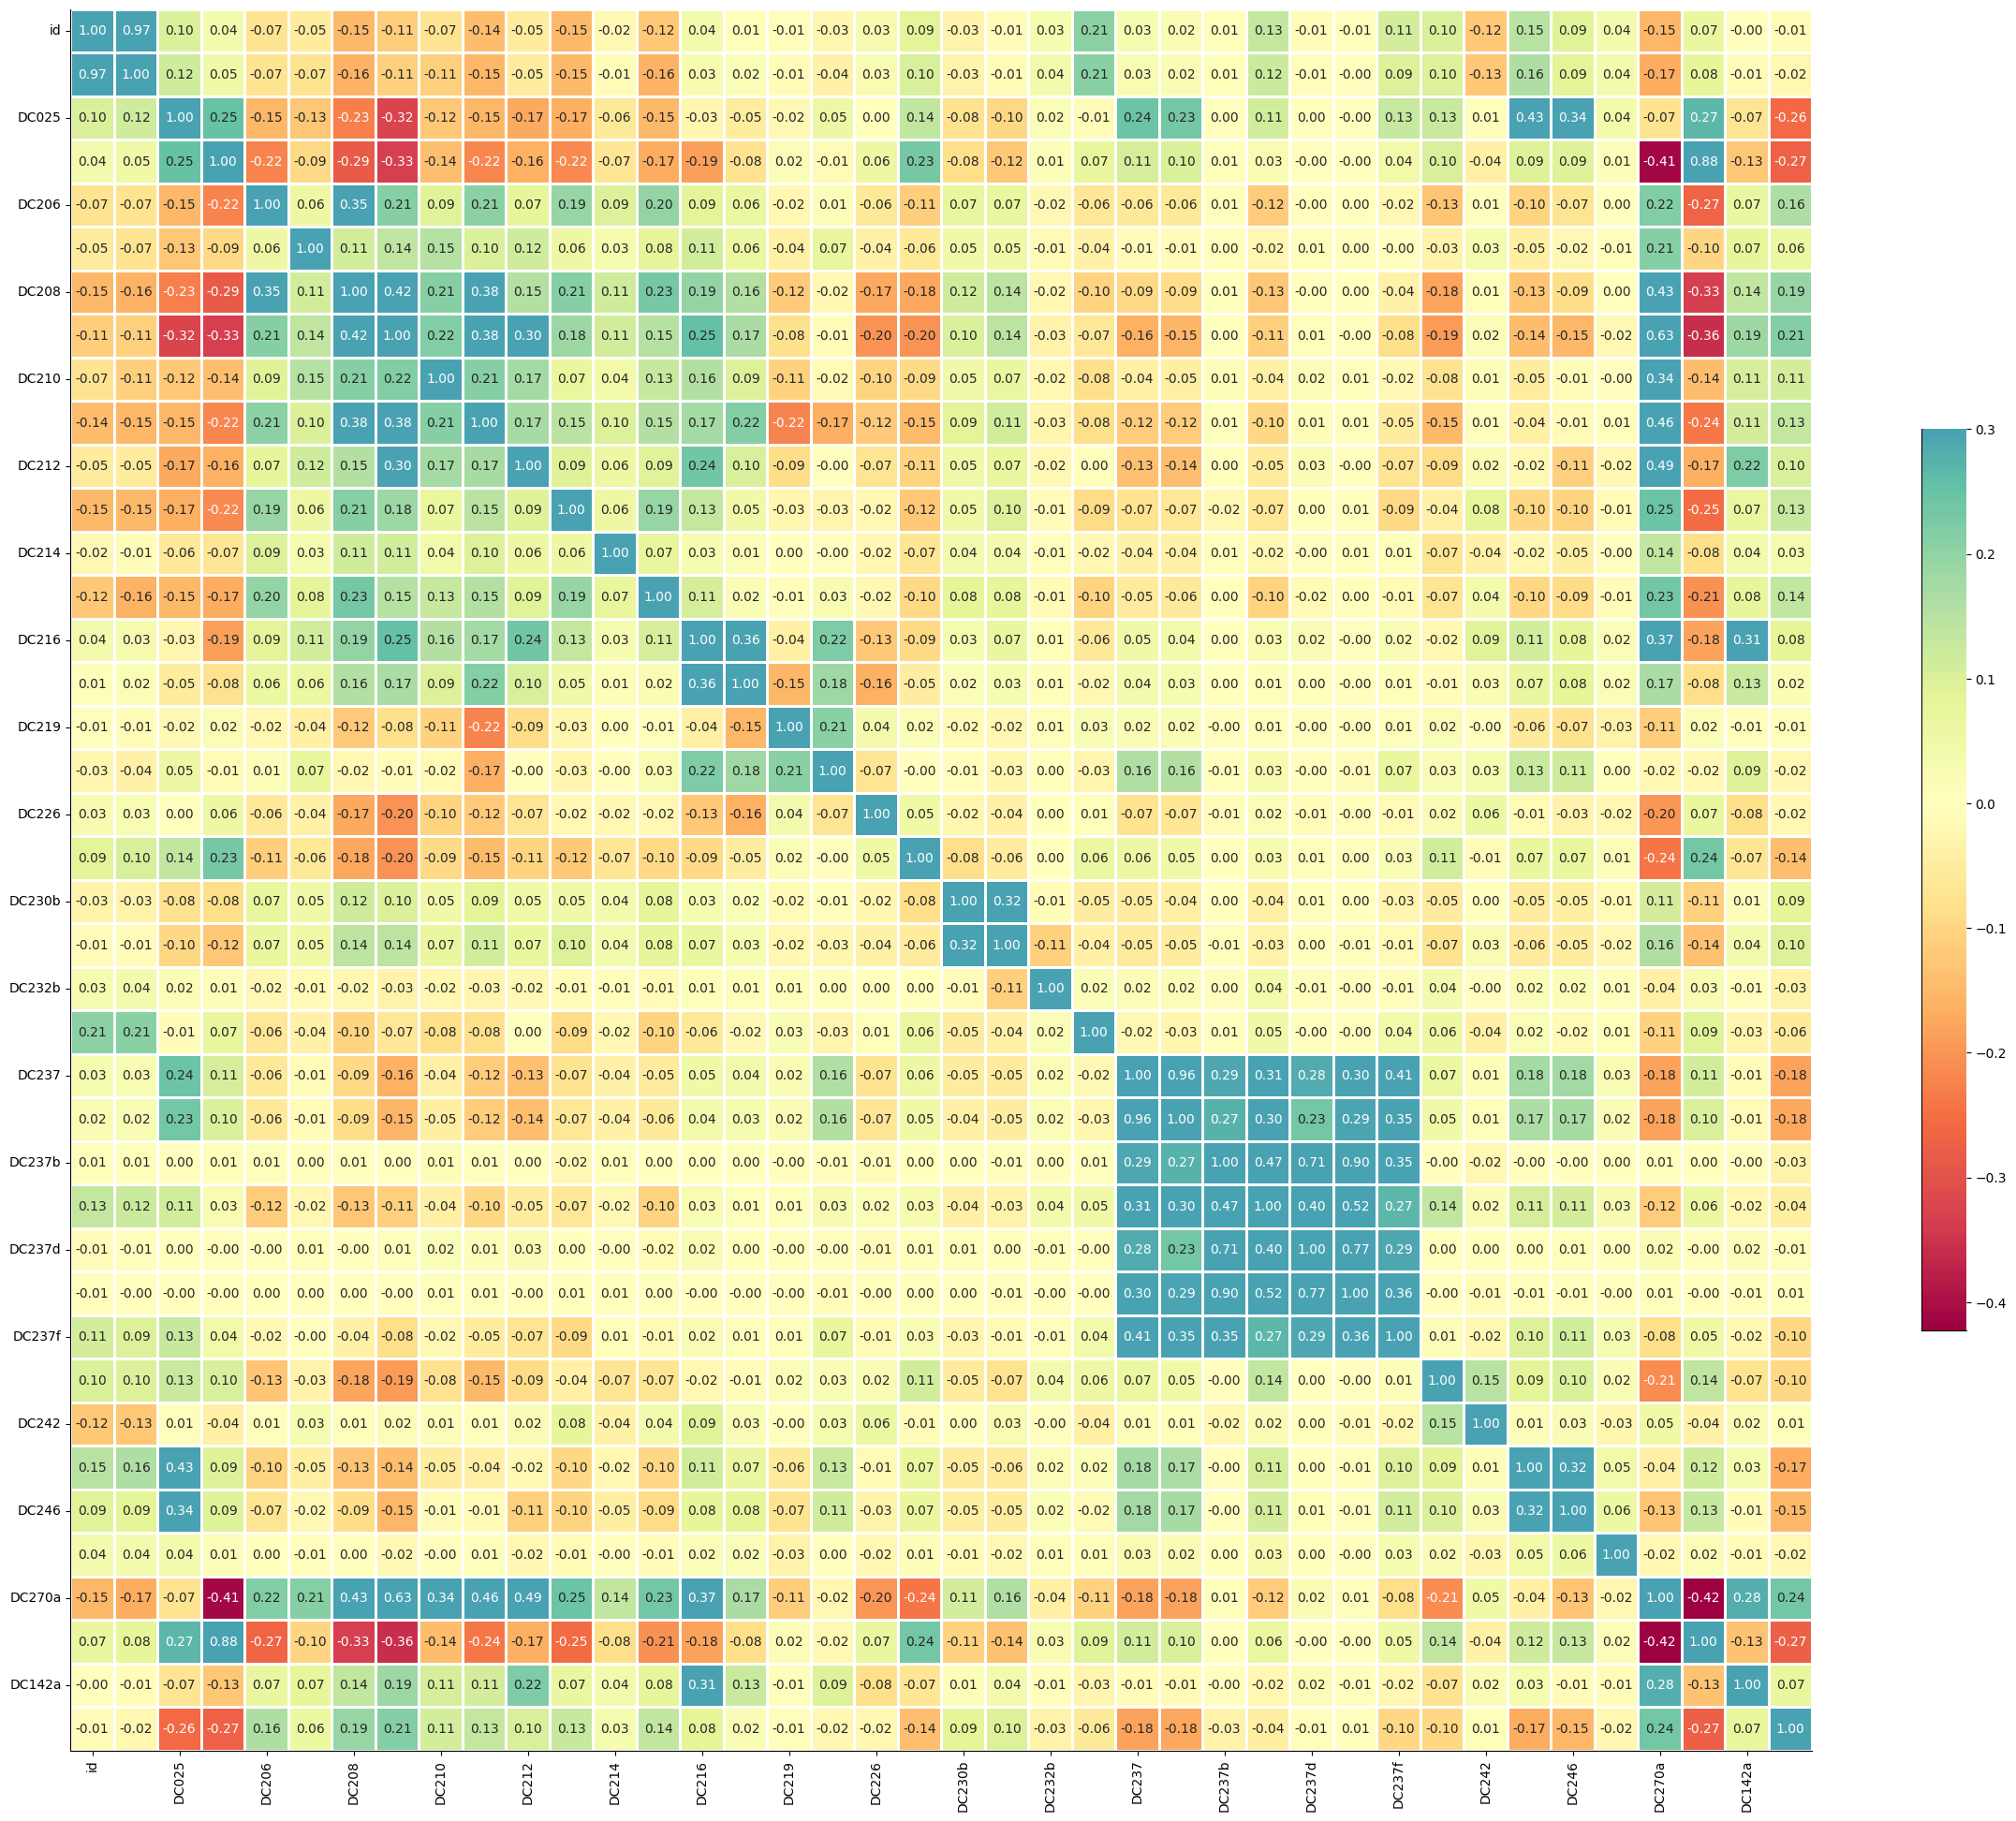

In [ ]:
corr = X.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30,25)

plt.show()

Buat Features baru hasil penggabungan

In [ ]:
X['memiliki']=X['DC207']+X['DC208']+X['DC209']+X['DC210']+X['DC211']+X['DC212']

In [ ]:
X['memiliki']

0        1.0
1        2.0
2        4.0
3        1.0
4        2.0
        ... 
35968    0.0
35969    2.0
35970    3.0
35971    3.0
35972    4.0
Name: memiliki, Length: 35973, dtype: float64

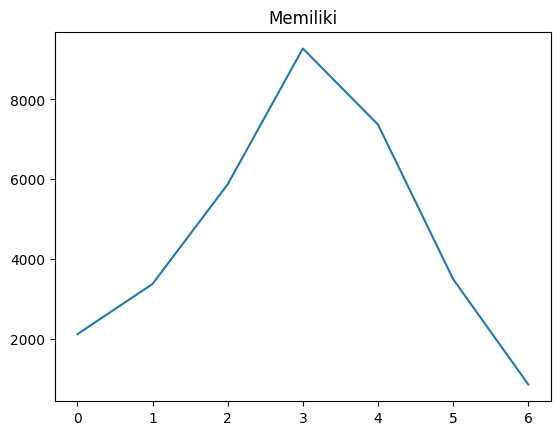

In [ ]:
df = X[X["DC201"] == 1].groupby(X['memiliki']).sum()
plt.title('Memiliki')
plt.plot(df['DC201'])
plt.show()

In [ ]:
X['bahan']= X['DC213']+ X['DC214']+ X['DC215']

In [ ]:
X['bahan']

0        102.0
1        102.0
2        102.0
3        102.0
4        102.0
         ...  
35968     76.0
35969     97.0
35970     76.0
35971     98.0
35972     96.0
Name: bahan, Length: 35973, dtype: float64

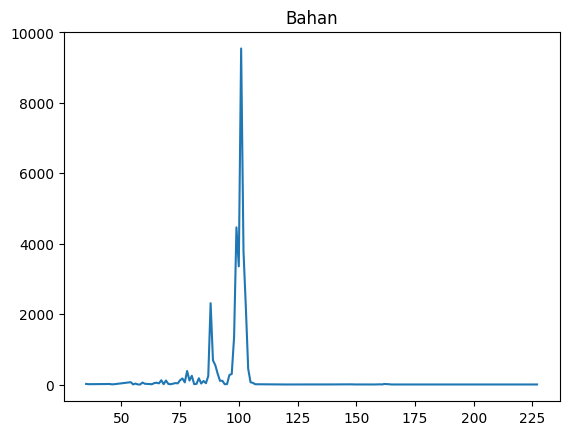

In [ ]:
df = X[X["DC201"] == 1].groupby(X['bahan']).sum()
plt.title('Bahan')
plt.plot(df['DC201'])
plt.show()

In [ ]:
X['cucitangan']=X['DC230a']+X['DC230b']

In [ ]:
X['cucitangan']

0        2.0
1        2.0
2        2.0
3        2.0
4        3.0
        ... 
35968    6.0
35969    2.0
35970    2.0
35971    2.0
35972    2.0
Name: cucitangan, Length: 35973, dtype: float64

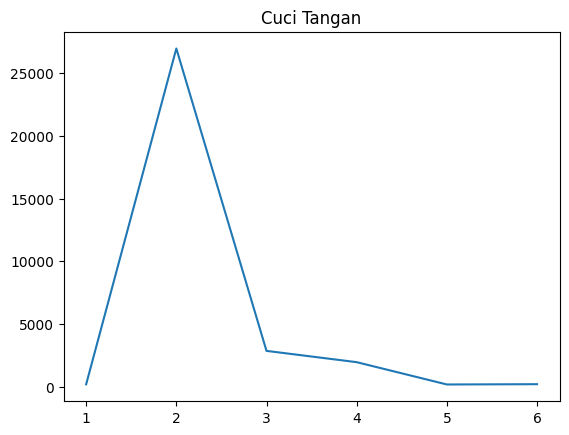

In [ ]:
df = X[X["DC201"] == 1].groupby(X['cucitangan']).sum()
plt.title('Cuci Tangan')
plt.plot(df['DC201'])
plt.show()

In [ ]:
X['barang']=X['DC232']+X['DC232b']

In [ ]:
X['barang']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
35968    1.0
35969    1.0
35970    1.0
35971    1.0
35972    1.0
Name: barang, Length: 35973, dtype: float64

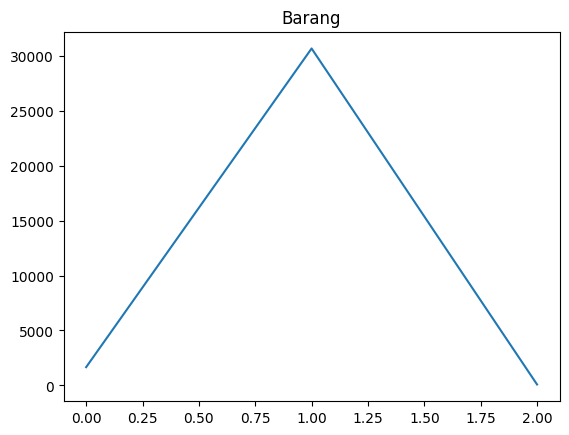

In [ ]:
df = X[X["DC201"] == 1].groupby(X['barang']).sum()
plt.title('Barang')
plt.plot(df['DC201'])
plt.show()

In [ ]:
X['olahan_air']=X['DC237a']+X['DC237b']+X['DC237c']+X['DC237d']+X['DC237e']+X['DC237f']

In [ ]:
X['olahan_air']

0        1.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
35968    0.0
35969    1.0
35970    1.0
35971    0.0
35972    0.0
Name: olahan_air, Length: 35973, dtype: float64

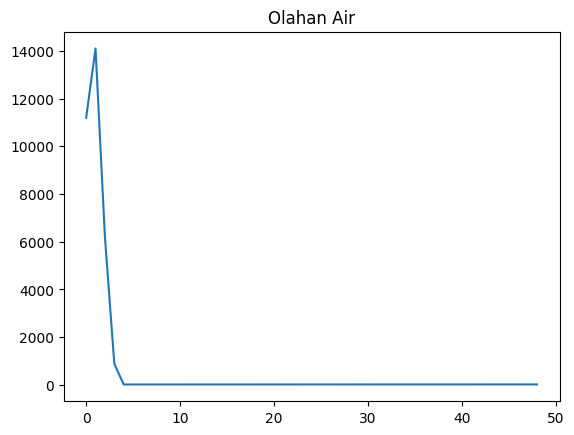

In [ ]:
df = X[X["DC201"] == 1].groupby(X['olahan_air']).sum()
plt.title('Olahan Air')
plt.plot(df['DC201'])
plt.show()

In [ ]:
X.columns

Index(['id', 'DC024', 'DC025', 'DC205', 'DC206', 'DC207', 'DC208', 'DC209',
       'DC210', 'DC211', 'DC212', 'DC213', 'DC214', 'DC215', 'DC216', 'DC217',
       'DC219', 'DC220', 'DC226', 'DC230a', 'DC230b', 'DC232', 'DC232b',
       'DC235', 'DC237', 'DC237a', 'DC237b', 'DC237c', 'DC237d', 'DC237e',
       'DC237f', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a', 'DC201', 'memiliki', 'bahan', 'cucitangan', 'barang',
       'olahan_air'],
      dtype='object')

In [ ]:
X.drop(['DC206','DC207','DC208','DC209','DC210','DC211','DC212','DC213','DC214','DC215','DC230a','DC230b','DC232','DC232b','DC237','DC237a','DC237b','DC237c','DC237d','DC237e','DC237f'],axis=1,inplace = True)

Y_label = X[['DC201']]

In [ ]:
X.columns

Index(['id', 'DC024', 'DC025', 'DC205', 'DC216', 'DC217', 'DC219', 'DC220',
       'DC226', 'DC235', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a', 'DC201', 'memiliki', 'bahan', 'cucitangan', 'barang',
       'olahan_air'],
      dtype='object')

In [ ]:
X.shape

(35973, 24)

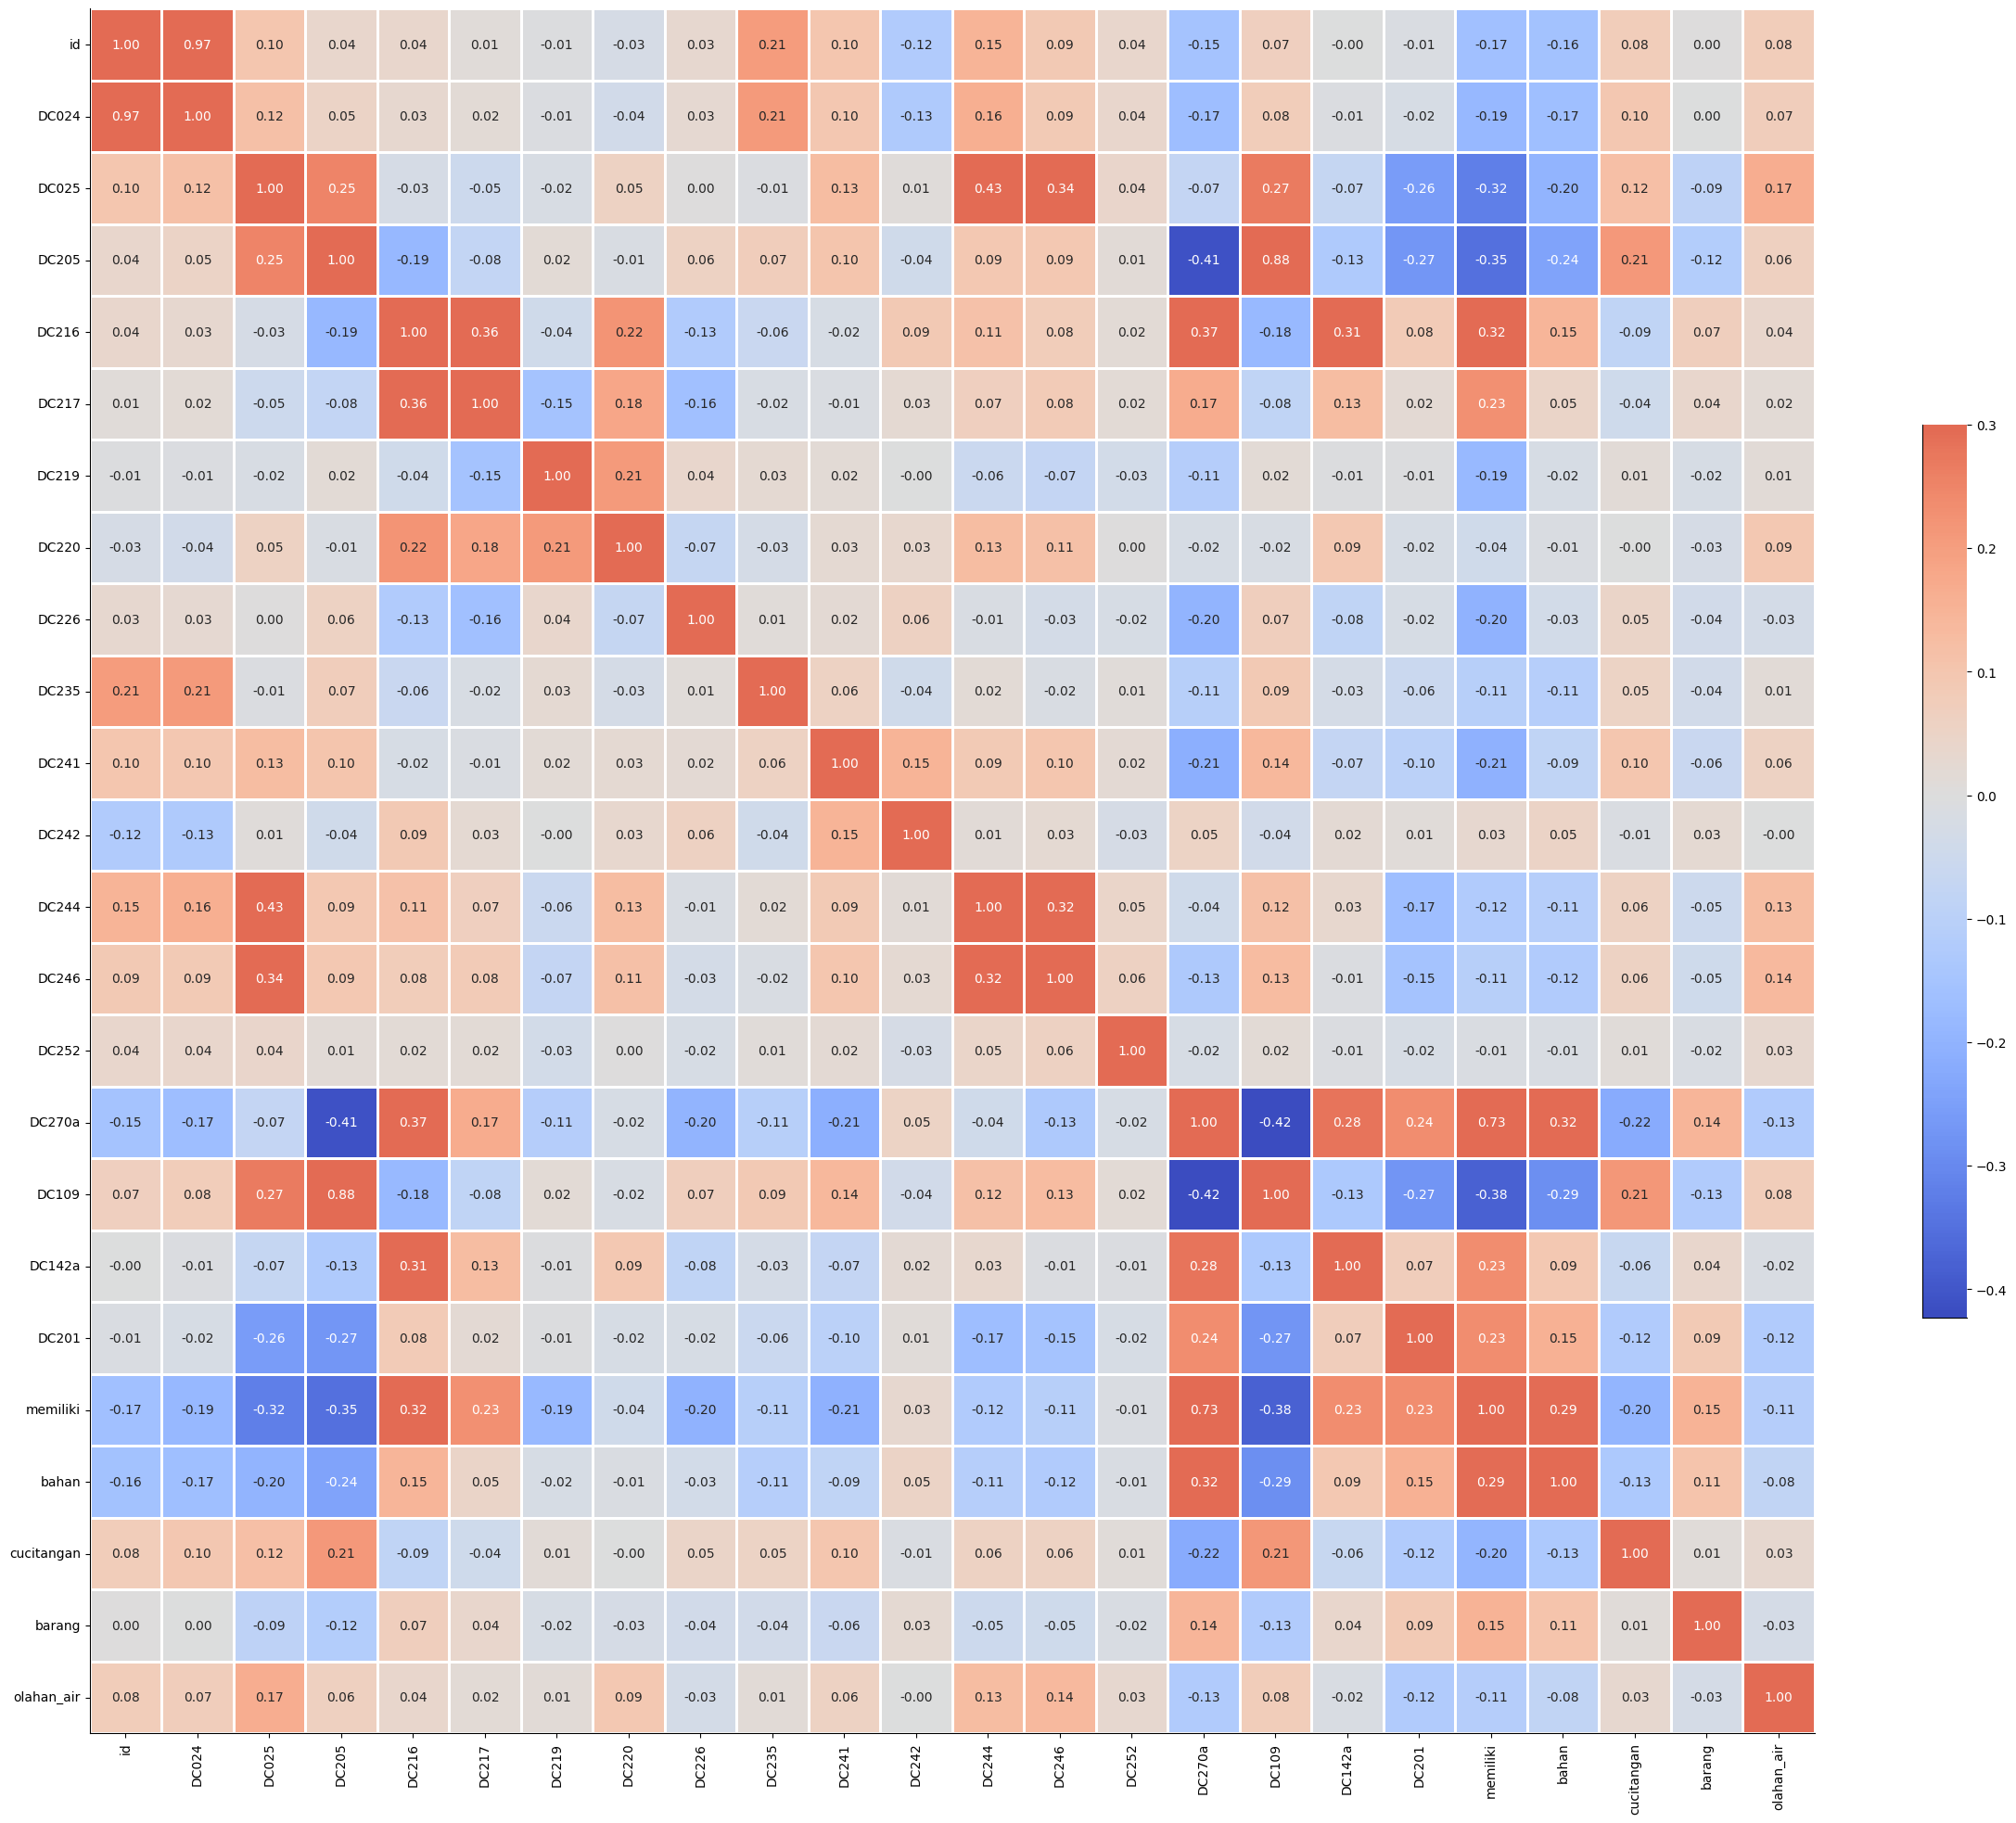

In [ ]:
corr = X.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(30,25)

plt.show()

In [ ]:
X.drop(['DC201'],axis=1,inplace = True)
frames =[X,Y_label]
data = pd.concat(frames,axis=1)

In [ ]:
data.shape

(35973, 24)

In [ ]:
data.head()

,id,DC024,DC025,DC205,DC216,DC217,DC219,DC220,DC226,DC235,...,DC252,DC270a,DC109,DC142a,memiliki,bahan,cucitangan,barang,olahan_air,DC201
0,1,11,2,16.0,1.0,1,2,80.0,8.0,1.0,...,2.0,1,12.0,60.0,1.0,102.0,2.0,1.0,1.0,1.0
1,2,11,2,31.0,2.0,4,1,44.0,2.0,1.0,...,1.0,2,31.0,70.0,2.0,102.0,2.0,1.0,1.0,1.0
2,3,11,2,12.0,2.0,2,1,35.0,2.0,1.0,...,0.0,4,11.0,75.0,4.0,102.0,2.0,1.0,1.0,1.0
3,6,11,2,12.0,3.0,4,1,79.0,8.0,1.0,...,1.0,1,11.0,85.0,1.0,102.0,2.0,1.0,1.0,1.0
4,7,11,2,12.0,2.0,3,2,37.0,8.0,1.0,...,0.0,2,11.0,65.0,2.0,102.0,3.0,1.0,2.0,1.0


In [ ]:
features = data.columns[:-1]
print(features)
labels = ['DC201']

Index(['id', 'DC024', 'DC025', 'DC205', 'DC216', 'DC217', 'DC219', 'DC220',
       'DC226', 'DC235', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a', 'memiliki', 'bahan', 'cucitangan', 'barang',
       'olahan_air'],
      dtype='object')


#Split Data

In [ ]:
train,test = train_test_split(data,test_size = 0.2,shuffle = True)
train_x,train_y = train[features],train[labels]
test_x,test_y = test[features],test[labels]

In [ ]:
train_x.head()

,id,DC024,DC025,DC205,DC216,DC217,DC219,DC220,DC226,DC235,...,DC246,DC252,DC270a,DC109,DC142a,memiliki,bahan,cucitangan,barang,olahan_air
3246,4463,12,1,12.0,2.0,4,2,44.0,2.0,3.0,...,0.0,1.0,3,11.0,77.0,3.0,99.0,2.0,1.0,1.0
5448,7555,16,2,12.0,1.0,4,1,44.0,2.0,1.0,...,1.0,0.0,4,11.0,72.0,3.0,90.0,3.0,1.0,1.0
20114,27571,36,2,17.0,2.0,2,1,30.0,8.0,3.0,...,0.0,1.0,2,21.0,32.0,3.0,103.0,2.0,1.0,2.0
6030,8286,16,1,12.0,4.0,4,1,39.0,2.0,1.0,...,0.0,0.0,5,11.0,77.0,4.0,101.0,2.0,1.0,1.0
8545,11830,21,1,12.0,3.0,4,2,46.0,2.0,3.0,...,0.0,0.0,5,11.0,150.0,4.0,99.0,2.0,1.0,0.0


In [ ]:
test_x.head()

,id,DC024,DC025,DC205,DC216,DC217,DC219,DC220,DC226,DC235,...,DC246,DC252,DC270a,DC109,DC142a,memiliki,bahan,cucitangan,barang,olahan_air
21708,29652,51,1,16.0,3.0,4,1,41.0,8.0,2.0,...,0.0,4.0,1,12.0,70.0,2.0,55.0,2.0,1.0,1.0
11538,15791,32,1,12.0,3.0,4,1,44.0,2.0,2.0,...,0.0,4.0,3,11.0,96.0,2.0,101.0,2.0,1.0,1.0
16198,22233,33,1,12.0,3.0,4,1,55.0,2.0,3.0,...,0.0,0.0,4,11.0,150.0,4.0,101.0,2.0,1.0,1.0
26298,35336,63,1,12.0,3.0,4,1,42.0,2.0,3.0,...,0.0,1.0,5,11.0,120.0,4.0,102.0,2.0,1.0,0.0
2600,3626,12,1,12.0,1.0,1,2,51.0,2.0,2.0,...,0.0,0.0,2,11.0,65.0,2.0,99.0,2.0,1.0,0.0


In [ ]:
test_y.head()

,DC201
21708,1.0
11538,1.0
16198,1.0
26298,1.0
2600,1.0


In [ ]:
train_y.head()

,DC201
3246,1.0
5448,1.0
20114,0.0
6030,1.0
8545,1.0


In [ ]:
train_x.columns

Index(['id', 'DC024', 'DC025', 'DC205', 'DC216', 'DC217', 'DC219', 'DC220',
       'DC226', 'DC235', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a', 'memiliki', 'bahan', 'cucitangan', 'barang',
       'olahan_air'],
      dtype='object')

In [ ]:
def transform_test(Test_X):

    # All the NULL values are populated with the mode

    d = Test_X
    ### LabelEcoding all categorical types #####
    for col in Test_X.columns:
        if Test_X[col].isnull().sum() and Test_X[col].dtypes != 'float64':
            Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].mode().min()
    for col in Test_X.columns:
        if Test_X[col].isnull().sum() and Test_X[col].dtypes == 'float64':
            Test_X[col].loc[(Test_X[col].isnull())] = Test_X[col].mode().min()

    data = d

    ### Synthesizing two new features cleanliness level of the individual and opinion of vaccine ####
    data['memiliki']=data['DC207']+data['DC208']+data['DC209']+data['DC210']+data['DC211']+data['DC212']

    data['bahan']= data['DC213']+ data['DC214']+ data['DC215']
    data['cucitangan']=data['DC230a']+data['DC230b']
    data['barang']=data['DC232']+data['DC232b']
    data['olahan_air']=data['DC237a']+data['DC237b']+data['DC237c']+data['DC237d']+data['DC237e']+data['DC237f']

    ###### Dropping other features #########
    data.drop(['DC206','DC207','DC208','DC209','DC210','DC211','DC212','DC213','DC214','DC215','DC230a','DC230b','DC232','DC232b','DC237','DC237a','DC237b','DC237c','DC237d','DC237e','DC237f'],axis=1,inplace = True)

    Test_X = data
    return data

In [ ]:
Test_X = pd.read_csv('/content/drive/MyDrive/GAMMAFEST IPB 2023 /test.csv')
Test_X.shape

(11990, 39)

In [ ]:
Test_X.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,26718,35,2,17,1,0,1,0,1,1,...,0,0,1,1,1,1,1,3,21,52
1,26802,35,1,12,1,1,1,1,0,1,...,0,0,1,1,0,0,1,2,11,18
2,41302,74,2,12,1,0,1,1,1,1,...,0,0,1,0,0,1,4,5,11,78
3,38698,72,1,12,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,11,20
4,44257,76,2,12,1,0,1,0,0,1,...,0,0,1,1,1,1,1,3,11,125


In [ ]:
Test_X.columns

Index(['id', 'DC024', 'DC025', 'DC205', 'DC206', 'DC207', 'DC208', 'DC209',
       'DC210', 'DC211', 'DC212', 'DC213', 'DC214', 'DC215', 'DC216', 'DC217',
       'DC219', 'DC220', 'DC226', 'DC230a', 'DC230b', 'DC232', 'DC232b',
       'DC235', 'DC237', 'DC237a', 'DC237b', 'DC237c', 'DC237d', 'DC237e',
       'DC237f', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a'],
      dtype='object')

In [ ]:
Test_X = transform_test(Test_X)

In [ ]:
Test_X.isnull().sum()

id            0
DC024         0
DC025         0
DC205         0
DC216         0
DC217         0
DC219         0
DC220         0
DC226         0
DC235         0
DC241         0
DC242         0
DC244         0
DC246         0
DC252         0
DC270a        0
DC109         0
DC142a        0
memiliki      0
bahan         0
cucitangan    0
barang        0
olahan_air    0
dtype: int64

In [ ]:
Test_X.columns

Index(['id', 'DC024', 'DC025', 'DC205', 'DC216', 'DC217', 'DC219', 'DC220',
       'DC226', 'DC235', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a', 'memiliki', 'bahan', 'cucitangan', 'barang',
       'olahan_air'],
      dtype='object')

In [ ]:
train_x.columns

Index(['id', 'DC024', 'DC025', 'DC205', 'DC216', 'DC217', 'DC219', 'DC220',
       'DC226', 'DC235', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a', 'memiliki', 'bahan', 'cucitangan', 'barang',
       'olahan_air'],
      dtype='object')

In [ ]:
data.columns

Index(['id', 'DC024', 'DC025', 'DC205', 'DC216', 'DC217', 'DC219', 'DC220',
       'DC226', 'DC235', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a', 'memiliki', 'bahan', 'cucitangan', 'barang',
       'olahan_air', 'DC201'],
      dtype='object')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
#Split column, save it to X and Y
#Split column, save it to X and Y
X = data[['id','DC201','DC024','DC235', 'DC025', 'DC205', 'DC216', 'DC217', 'DC219', 'DC220', 'DC226','DC241', 'DC242','DC244','DC246','DC252', 'DC270a', 'DC109','DC142a', 'memiliki', 'bahan', 'cucitangan', 'barang', 'olahan_air']]
y = data[['DC201']]

In [ ]:
X.columns

Index(['id', 'DC201', 'DC024', 'DC235', 'DC025', 'DC205', 'DC216', 'DC217',
       'DC219', 'DC220', 'DC226', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252',
       'DC270a', 'DC109', 'DC142a', 'memiliki', 'bahan', 'cucitangan',
       'barang', 'olahan_air'],
      dtype='object')

In [ ]:
X.shape

(35973, 24)

In [ ]:
y.shape

(35973, 1)

In [ ]:
Test_X.shape

(11990, 23)

In [ ]:
Test_X.columns

Index(['id', 'DC024', 'DC025', 'DC205', 'DC216', 'DC217', 'DC219', 'DC220',
       'DC226', 'DC235', 'DC241', 'DC242', 'DC244', 'DC246', 'DC252', 'DC270a',
       'DC109', 'DC142a', 'memiliki', 'bahan', 'cucitangan', 'barang',
       'olahan_air'],
      dtype='object')

In [ ]:
dftrain = X
dftest = Test_X
print(dftrain.shape)
print(dftest.shape)

(35973, 24)
(11990, 23)


In [ ]:
X['DC235'] = X['DC235'].astype('int64')
X['DC205'] = X['DC205'].astype('int64')
X['DC216'] = X['DC216'].astype('int64')
X['DC220'] = X['DC220'].astype('int64')
X['DC226'] = X['DC226'].astype('int64')
X['DC241'] = X['DC241'].astype('int64')
X['DC242'] = X['DC242'].astype('int64')
X['DC244'] = X['DC244'].astype('int64')
X['DC246'] = X['DC246'].astype('int64')
X['DC252'] = X['DC252'].astype('int64')
X['DC109'] = X['DC109'].astype('int64')
X['DC142a'] = X['DC142a'].astype('int64')
X['memiliki'] = X['memiliki'].astype('int64')
X['bahan'] = X['bahan'].astype('int64')
X['barang'] = X['barang'].astype('int64')
X['cucitangan'] = X['cucitangan'].astype('int64')
X['olahan_air'] = X['olahan_air'].astype('int64')

In [ ]:
print(dftrain.dtypes)
print(dftest.dtypes)

id              int64
DC201         float64
DC024           int64
DC235           int64
DC025           int64
DC205           int64
DC216           int64
DC217           int64
DC219           int64
DC220           int64
DC226           int64
DC241           int64
DC242           int64
DC244           int64
DC246           int64
DC252           int64
DC270a          int64
DC109           int64
DC142a          int64
memiliki        int64
bahan           int64
cucitangan      int64
barang          int64
olahan_air      int64
dtype: object
id            int64
DC024         int64
DC025         int64
DC205         int64
DC216         int64
DC217         int64
DC219         int64
DC220         int64
DC226         int64
DC235         int64
DC241         int64
DC242         int64
DC244         int64
DC246         int64
DC252         int64
DC270a        int64
DC109         int64
DC142a        int64
memiliki      int64
bahan         int64
cucitangan    int64
barang        int64
olahan_air    int6

In [ ]:
dftrain.describe(include='all')

,id,DC201,DC024,DC235,DC025,DC205,DC216,DC217,DC219,DC220,...,DC246,DC252,DC270a,DC109,DC142a,memiliki,bahan,cucitangan,barang,olahan_air
count,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,...,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000,35973.000000
mean,24336.069775,0.900703,43.229088,2.299614,1.468601,14.985823,2.323381,3.004976,1.156117,48.475496,...,0.379479,1.206933,2.699330,15.497262,82.635449,2.823117,96.943958,2.276040,0.944264,0.970422
std,13828.886872,0.299064,23.585684,0.825393,0.499020,6.060356,1.104703,1.149772,0.362971,13.712509,...,0.485264,1.227869,1.435673,9.596897,91.132509,1.476073,9.015935,0.694271,0.243408,1.226679
min,1.000000,0.000000,11.000000,1.000000,1.000000,12.000000,0.000000,0.000000,1.000000,13.000000,...,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000
25%,12341.000000,1.000000,31.000000,2.000000,1.000000,12.000000,2.000000,2.000000,1.000000,38.000000,...,0.000000,0.000000,1.000000,11.000000,42.000000,2.000000,98.000000,2.000000,1.000000,0.000000
50%,24787.000000,1.000000,35.000000,3.000000,1.000000,12.000000,2.000000,4.000000,1.000000,48.000000,...,0.000000,1.000000,3.000000,11.000000,63.000000,3.000000,100.000000,2.000000,1.000000,1.000000
75%,36131.000000,1.000000,64.000000,3.000000,2.000000,16.000000,3.000000,4.000000,1.000000,58.000000,...,1.000000,1.000000,4.000000,12.000000,96.000000,4.000000,101.000000,2.000000,1.000000,1.000000
max,47963.000000,1.000000,94.000000,3.000000,2.000000,96.000000,20.000000,5.000000,2.000000,98.000000,...,1.000000,4.000000,5.000000,96.000000,998.000000,6.000000,227.000000,6.000000,2.000000,48.000000


In [ ]:
dftest.describe(include='all')

,id,DC024,DC025,DC205,DC216,DC217,DC219,DC220,DC226,DC235,...,DC246,DC252,DC270a,DC109,DC142a,memiliki,bahan,cucitangan,barang,olahan_air
count,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,...,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000,11990.000000
mean,22919.702085,40.772060,1.545955,14.995163,2.340784,3.001251,1.142118,48.422852,3.598249,1.916764,...,0.421601,1.231193,2.794329,15.399750,83.574145,2.910509,97.058382,2.093828,0.937698,0.993078
std,13843.033050,23.383389,0.497904,6.090866,1.075030,1.124236,0.349186,13.283872,2.538678,0.820586,...,0.493836,1.216327,1.408209,9.589858,85.810562,1.407977,8.706506,0.312852,0.258069,1.076614
min,4.000000,11.000000,1.000000,12.000000,0.000000,0.000000,1.000000,13.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000
25%,10761.250000,19.000000,1.000000,12.000000,2.000000,2.000000,1.000000,39.000000,2.000000,1.000000,...,0.000000,0.000000,2.000000,11.000000,48.000000,2.000000,98.000000,2.000000,1.000000,0.000000
50%,22062.500000,33.000000,2.000000,12.000000,2.000000,4.000000,1.000000,47.000000,2.000000,2.000000,...,0.000000,1.000000,3.000000,11.000000,66.000000,3.000000,101.000000,2.000000,1.000000,1.000000
75%,35135.750000,63.000000,2.000000,16.000000,3.000000,4.000000,1.000000,57.000000,5.000000,3.000000,...,1.000000,1.000000,4.000000,12.000000,96.000000,4.000000,101.000000,2.000000,1.000000,1.000000
max,47960.000000,94.000000,2.000000,96.000000,22.000000,5.000000,2.000000,95.000000,9.000000,3.000000,...,1.000000,4.000000,5.000000,96.000000,998.000000,6.000000,223.000000,3.000000,2.000000,48.000000


# Uji Multikolinearitas

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)

        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [ ]:
calculate_vif(df=dftrain, features=['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC252','DC270a','DC109','DC142a','DC244','DC246','bahan','cucitangan','barang','olahan_air'])

,VIF,Tolerance
DC235,1.065689,0.938360
DC024,1.159505,0.862437
DC025,1.470507,0.680037
DC205,4.534590,0.220527
DC216,1.458714,0.685535
DC217,1.227165,0.814886
DC219,1.111091,0.900016
DC220,1.184400,0.844309
DC226,1.077174,0.928355
DC241,1.110443,0.900542


In [ ]:
calculate_vif(df=dftrain, features=['DC024','DC217','DC219','DC220','DC226','DC241','DC242','DC252','DC142a','bahan','cucitangan','barang','olahan_air'])

,VIF,Tolerance
DC024,1.069345,0.935152
DC217,1.115978,0.896075
DC219,1.089376,0.917957
DC220,1.120612,0.892370
DC226,1.044038,0.957819
DC241,1.063053,0.940687
DC242,1.056542,0.946484
DC252,1.005017,0.995008
DC142a,1.041859,0.959823
bahan,1.073196,0.931796


In [ ]:
calculate_vif(df=dftrain, features=['DC024','DC219','DC226','DC241','DC242','DC252','DC142a','bahan','cucitangan','barang','olahan_air'])

,VIF,Tolerance
DC024,1.066002,0.938084
DC219,1.004109,0.995908
DC226,1.019193,0.981168
DC241,1.062557,0.941126
DC242,1.054701,0.948136
DC252,1.004785,0.995238
DC142a,1.023587,0.976956
bahan,1.071815,0.932997
cucitangan,1.036783,0.964522
barang,1.019476,0.980896


# Modelling

In [ ]:
x_wistara6 = dftrain[['DC024','DC219','DC226','DC241','DC242','DC252','DC142a','bahan','cucitangan','barang','olahan_air']]
y_wistara6 = dftrain[['DC201']]

x_pred_wistara6 = dftest[['DC024','DC219','DC226','DC241','DC242','DC252','DC142a','bahan','cucitangan','barang','olahan_air']]

In [ ]:
print('x', x_wistara6.shape)
print('y', y_wistara6.shape)
print('x_pred', x_pred_wistara6.shape)

x (35973, 20)
y (35973, 1)
x_pred (11990, 20)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_wistara6, y_wistara6, test_size=0.15)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('x_pred', x_pred_wistara6.shape)

x_train (28778, 20)
x_test (7195, 20)
y_train (28778, 1)
y_test (7195, 1)
x_pred (11990, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pab2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.46227460055813535, n_estimators=244,
                   random_state=33)
pab2.fit(x_train, y_train.values.ravel())
y_test_hat_pab2 = pab2.predict(x_test)
y_pred_pab2 = pab2.predict(x_pred_wistara6)
f1_score(y_test, y_test_hat_pab2, average=None)

array([0.36275461, 0.95081967])

In [ ]:
print(classification_report(y_test, y_test_hat_pab2, digits = 8))

              precision    recall  f1-score   support

         0.0  0.59744409 0.26044568 0.36275461       718
         1.0  0.92284220 0.98054655 0.95081967      6477

    accuracy                      0.90868659      7195
   macro avg  0.76014314 0.62049612 0.65678714      7195
weighted avg  0.89037022 0.90868659 0.89213576      7195



In [ ]:
#prf = RandomForestClassifier(n_estimators=512, criterion='gini', random_state=10)
prf_wistara6 = RandomForestClassifier(n_estimators=512, criterion='entropy', random_state=42)
#prf_wistara6 = RandomForestClassifier(max_features=1, n_estimators=512,criterion='entropy', n_jobs=1, random_state=42)
prf_wistara6.fit(x_train, y_train.values.ravel())
y_test_hat_wistara6 = prf_wistara6.predict(x_test)
y_pred_wistara6 = prf_wistara6.predict(x_pred_wistara6)
f1_score(y_test, y_test_hat_wistara6, average=None)

array([0.30328738, 0.95114152])

In [ ]:
print(classification_report(y_test, y_test_hat_wistara6, digits = 8))

              precision    recall  f1-score   support

         0.0  0.47085202 0.19699812 0.27777778       533
         1.0  0.91726271 0.97573514 0.94559585      4863

    accuracy                      0.89881394      5396
   macro avg  0.69405736 0.58636663 0.61168682      5396
weighted avg  0.87316766 0.89881394 0.87963087      5396



#0.95572429 dan f1_score = 0.91530764 pake mode().min()




In [ ]:
x_wistara5 = dftrain[['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]
y_wistara5 = dftrain[['DC201']]

x_pred_wistara5 = dftest[['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]

In [ ]:
print('x', x_wistara5.shape)
print('y', y_wistara5.shape)
print('x_pred', x_pred_wistara5.shape)

x (35973, 22)
y (35973, 1)
x_pred (11990, 22)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_wistara5, y_wistara5, test_size=0.15)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('x_pred', x_pred_wistara5.shape)

x_train (30577, 22)
x_test (5396, 22)
y_train (30577, 1)
y_test (5396, 1)
x_pred (11990, 22)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.46227460055813535, n_estimators=244,
                   random_state=33)
pab.fit(x_train, y_train.values.ravel())
y_test_hat_pab = pab.predict(x_test)
y_pred_pab = pab.predict(x_pred_wistara5)
f1_score(y_test, y_test_hat_pab, average=None)

array([0.36977058, 0.95353696])

In [ ]:
print(classification_report(y_test, y_test_hat_pab, digits = 8))

              precision    recall  f1-score   support

         0.0  0.60619469 0.26601942 0.36977058       515
         1.0  0.92688588 0.98176603 0.95353696      4881

    accuracy                      0.91345441      5396
   macro avg  0.76654029 0.62389272 0.66165377      5396
weighted avg  0.89627877 0.91345441 0.89782167      5396



In [ ]:
#prf = RandomForestClassifier(n_estimators=512, criterion='gini', random_state=10)
prf_wistara5 = RandomForestClassifier(n_estimators=512, criterion='entropy', random_state=42)
#prf = RandomForestClassifier(max_features=1, n_estimators=512, n_jobs=1, random_state=1)
prf_wistara5.fit(x_train, y_train.values.ravel())
y_test_hat_wistara5 = prf_wistara5.predict(x_test)
y_pred_wistara5 = prf_wistara5.predict(x_pred_wistara5)
f1_score(y_test, y_test_hat_wistara5, average=None)

array([0.31029186, 0.95572429])

In [ ]:
print(classification_report(y_test, y_test_hat_wistara5, digits = 8))

              precision    recall  f1-score   support

         0.0  0.74264706 0.19611650 0.31029186       515
         1.0  0.92129278 0.99282934 0.95572429      4881

    accuracy                      0.91679021      5396
   macro avg  0.83196992 0.59447292 0.63300807      5396
weighted avg  0.90424264 0.91679021 0.89412353      5396



#0.9533 dan f1_score = 0.91234248 Pake Median dan Min

In [ ]:
x_wistara4 = dftrain[['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]
y_wistara4 = dftrain[['DC201']]

x_pred_wistara4 = dftest[['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]

In [ ]:
print('x', x_wistara4.shape)
print('y', y_wistara4.shape)
print('x_pred', x_pred_wistara4.shape)

x (35973, 22)
y (35973, 1)
x_pred (11990, 22)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_wistara4, y_wistara4, test_size=0.15)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('x_pred', x_pred_wistara4.shape)

x_train (30577, 22)
x_test (5396, 22)
y_train (30577, 1)
y_test (5396, 1)
x_pred (11990, 22)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#prf = RandomForestClassifier(n_estimators=512, criterion='gini', random_state=10)
prf_wistara4 = RandomForestClassifier(n_estimators=512, criterion='entropy', random_state=0)
#prf = RandomForestClassifier(max_features=1, n_estimators=512, n_jobs=1, random_state=1)
prf_wistara4.fit(x_train, y_train.values.ravel())
y_test_hat_wistara4 = prf_wistara4.predict(x_test)
y_pred_wistara4 = prf_wistara4.predict(x_pred_wistara4)
f1_score(y_test, y_test_hat_wistara4, average=None)

array([0.29210134, 0.95306788])

In [ ]:
print(classification_report(y_test, y_test_hat_wistara4, digits = 8))

              precision    recall  f1-score   support

         0.0  0.65151515 0.16764133 0.26666667       513
         1.0  0.91888298 0.99057956 0.95338524      4883

    accuracy                      0.91234248      5396
   macro avg  0.78519907 0.57911044 0.61002595      5396
weighted avg  0.89346421 0.91234248 0.88809861      5396



#0.9526 dan f1_score = 0.91160119 Pake Modus dan Min

In [ ]:
x_wistara3 = dftrain[['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]
y_wistara3 = dftrain[['DC201']]

x_pred_wistara3 = dftest[['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]

In [ ]:
print('x', x_wistara3.shape)
print('y', y_wistara3.shape)
print('x_pred', x_pred_wistara3.shape)

x (35973, 22)
y (35973, 1)
x_pred (11990, 22)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_wistara3, y_wistara3, test_size=0.15)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('x_pred', x_pred_wistara3.shape)

x_train (30577, 22)
x_test (5396, 22)
y_train (30577, 1)
y_test (5396, 1)
x_pred (11990, 22)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#prf = RandomForestClassifier(n_estimators=512, criterion='gini', random_state=10)
prf_wistara3 = RandomForestClassifier(n_estimators=512, criterion='entropy', random_state=0)
#prf = RandomForestClassifier(max_features=1, n_estimators=512, n_jobs=1, random_state=1)
prf_wistara3.fit(x_train, y_train.values.ravel())
y_test_hat_wistara3 = prf_wistara3.predict(x_test)
y_pred_wistara3 = prf_wistara3.predict(x_pred_wistara3)
f1_score(y_test, y_test_hat_wistara3, average=None)

array([0.32911392, 0.95268327])

In [ ]:
print(classification_report(y_test, y_test_hat_wistara3, digits = 8))

              precision    recall  f1-score   support

         0.0  0.69642857 0.21546961 0.32911392       543
         1.0  0.91851568 0.98949104 0.95268327      4853

    accuracy                      0.91160119      5396
   macro avg  0.80747213 0.60248032 0.64089859      5396
weighted avg  0.89616704 0.91160119 0.88993342      5396



#0.952 dan f1_score 91% Pake Modus Max

In [ ]:
x_wistara2 = dftrain[['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]
y_wistara2 = dftrain[['DC201']]

x_pred_wistara2 = dftest[['DC235','DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]

In [ ]:
print('x', x_wistara2.shape)
print('y', y_wistara2.shape)
print('x_pred', x_pred_wistara2.shape)

x (35973, 22)
y (35973, 1)
x_pred (11990, 22)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_wistara2, y_wistara2, test_size=0.15)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('x_pred', x_pred_wistara2.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#prf = RandomForestClassifier(n_estimators=512, criterion='gini', random_state=10)
prf_wistara2 = RandomForestClassifier(n_estimators=512, criterion='entropy', random_state=0)
#prf = RandomForestClassifier(max_features=1, n_estimators=512, n_jobs=1, random_state=1)
prf_wistara2.fit(x_train, y_train.values.ravel())
y_test_hat_wistara2 = prf_wistara2.predict(x_test)
y_pred_wistara2 = prf_wistara2.predict(x_pred_wistara2)
f1_score(y_test, y_test_hat_wistara2, average=None)

array([0.28231798, 0.95226801])

In [ ]:
print(classification_report(y_test, y_test_hat_wistara2, digits = 8))

              precision    recall  f1-score   support

         0.0  0.65068493 0.18026565 0.28231798       527
         1.0  0.91771429 0.98952557 0.95226801      4869

    accuracy                      0.91048925      5396
   macro avg  0.78419961 0.58489561 0.61729299      5396
weighted avg  0.89163488 0.91048925 0.88683738      5396



#Model 0.979

In [ ]:
x_wistara = dftrain[['DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]
y_wistara = dftrain[['DC201']]

x_pred_wistara = dftest[['DC024','DC025','DC205','DC216','DC217','DC219','DC220','DC226','DC241','DC242','DC244','DC246','DC252','DC270a','DC109','DC142a','memiliki','bahan','cucitangan','barang','olahan_air']]

In [ ]:
print('x', x_wistara.shape)
print('y', y_wistara.shape)
print('x_pred', x_pred_wistara.shape)

x (35973, 21)
y (35973, 1)
x_pred (11990, 21)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_wistara, y_wistara, test_size=0.15)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('x_pred', x_pred_wistara.shape)

x_train (30577, 21)
x_test (5396, 21)
y_train (30577, 1)
y_test (5396, 1)
x_pred (11990, 21)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
#prf = RandomForestClassifier(n_estimators=512, criterion='gini', random_state=10)
prf_wistara = RandomForestClassifier(n_estimators=512, criterion='entropy', random_state=0)
#prf = RandomForestClassifier(max_features=1, n_estimators=512, n_jobs=1, random_state=1)
prf_wistara.fit(x_train, y_train.values.ravel())
y_test_hat_wistara = prf_wistara.predict(x_test)
y_pred_wistara = prf_wistara.predict(x_pred_wistara)
f1_score(y_test, y_test_hat_wistara, average=None)

KeyboardInterrupt: ignored

In [ ]:
print(classification_report(y_test, y_test_hat_wistara, digits = 8))

#Submission Benar

In [ ]:
import pickle

In [ ]:
pickle.dump(prf_wistara5 , open('prf_wistara5.pkl', 'wb'))

In [ ]:
output = pd.DataFrame({'id': dftest.id,'DC201': y_pred_wistara2})
output.id = output.id.astype(str)
output.to_csv('submission.csv',index=False,quoting=2)

In [ ]:
!head -n20 'submission.csv'

"id","DC201"
"26718",1.0
"26802",1.0
"41302",1.0
"38698",1.0
"44257",1.0
"4087",1.0
"2543",1.0
"39565",1.0
"4871",1.0
"46131",1.0
"46160",1.0
"45834",1.0
"16872",1.0
"6716",1.0
"9512",1.0
"40285",1.0
"23031",1.0
"3743",1.0
"32354",0.0


In [ ]:
sub=pd.read_csv('/content/submission.csv')

In [ ]:
sub.head()

,id,DC201
0,26718,1.0
1,26802,1.0
2,41302,1.0
3,38698,1.0
4,44257,1.0


In [ ]:
sub['DC201'] = sub['DC201'].replace({1.0:'Layak Minum', 0.0: 'Tidak Layak Minum'})

In [ ]:
sub

,id,DC201
0,26718,Layak Minum
1,26802,Layak Minum
2,41302,Layak Minum
3,38698,Layak Minum
4,44257,Layak Minum
...,...,...
11985,36943,Layak Minum
11986,33415,Layak Minum
11987,41998,Layak Minum
11988,41567,Tidak Layak Minum


In [ ]:
sub.to_csv('submission_wistara5.csv',index=False,quoting=2)

#Submission

In [ ]:
import pickle

In [ ]:
submission = clf.predict_proba(Test_X.values)
#submission_df = pd.read_csv('/content/drive/MyDrive/FINDIT 2023/submission_format.csv')

In [ ]:
submission = clf.predict_proba(Test_X.values)
submission_df = pd.DataFrame.sparse.from_spmatrix(submission)

In [ ]:
trial = submission_df
trial['id'] = trial.index+26707 # Converting the default indices
trial['DC201'] = trial[0].astype('str') # Data required to be in float64
trial.set_index('id') # Make index as respondent_id
trial.drop([0],axis=1,inplace=True) # Drop old index axis
submission_df = trial

In [ ]:
submission_df

In [ ]:
submission_df.to_csv('submission.csv',index = False)